In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data.csv')
n = len(data)
num_plays = data['play_id']

0         28.72
1         24.75
2         20.97
3         26.41
4        -19.41
          ...  
116291    20.93
116292   -37.27
116293   -34.10
116294    14.16
116295    13.56
Name: player_x, Length: 116296, dtype: float64
0        -19.61
1         -9.47
2        -11.14
3        -18.99
4         19.95
          ...  
116291    -2.87
116292    -9.87
116293   -11.99
116294    18.58
116295     7.91
Name: player_y, Length: 116296, dtype: float64


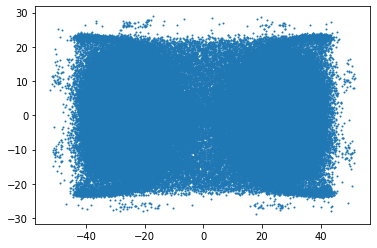

In [101]:
print(data['player_x'])
print(data['player_y'])
plt.scatter(data['player_x'], data['player_y'], marker='o', s=1)
plt.show()

In [102]:
play_types = data['play_type'].unique().ravel()
play_type_dict = {value: index for index, value in enumerate(play_types)}
num_plays = len(play_types)
subsequent_play = np.zeros((num_plays, num_plays))

current_play_num = 0
for i in range(n):
    current_play = data['play_type'][i]
    if current_play_num == data['play_id'][i]:
        continue
    elif data['play_id'][i] == 1:
        current_play_num = 1
    else:
        previous_play = data['play_type'][i-1]
        current_play_num += data['play_id'][i]-data['play_id'][i-1]
        subsequent_play[play_type_dict[previous_play]][play_type_dict[current_play]] += 1

for i in range(len(subsequent_play)):
    total = subsequent_play[i].sum()
    for j in range(len(subsequent_play[i])):
        
        subsequent_play[i][j] = subsequent_play[i][j] / total * 100
        
print(subsequent_play)

[[6.75163624e+00 1.24009645e+01 2.34584912e+01 6.78608336e+00
  1.95315191e+01 6.02824664e+00 3.47915949e+00 3.99586635e+00
  4.47812608e-01 3.85807785e+00 2.41129866e+00 1.89459180e+00
  1.27454358e+00 5.51153979e-01 3.78918360e+00 2.37685153e+00
  7.57836721e-01 2.06682742e-01]
 [6.73076923e+00 8.43195266e+00 2.85502959e+01 8.23471400e+00
  1.83678501e+01 3.20512821e+00 3.50098619e+00 3.50098619e+00
  5.91715976e-01 4.65976331e+00 3.64891519e+00 2.46548323e-02
  1.87376726e+00 3.20512821e-01 5.15285996e+00 2.07100592e+00
  5.42406312e-01 5.91715976e-01]
 [5.80186097e+00 1.47509579e+01 1.85367634e+01 4.97172049e+00
  2.26327313e+01 6.92391899e+00 5.86571793e+00 3.75843824e+00
  3.28407225e-01 2.88268564e+00 2.14376939e+00 3.21109287e+00
  1.07644590e+00 4.10509031e-01 4.08684547e+00 1.61466886e+00
  4.65243569e-01 5.38222952e-01]
 [5.90288797e+00 4.22088226e+00 1.51380514e+01 4.63344970e+00
  2.26912091e+01 6.44239924e+00 7.64836560e+00 2.38019676e+00
  4.12567439e-01 3.04665186e+00 2

18


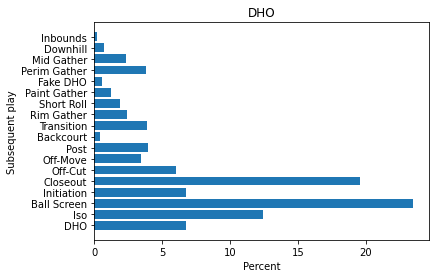

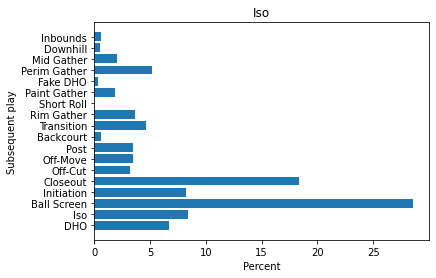

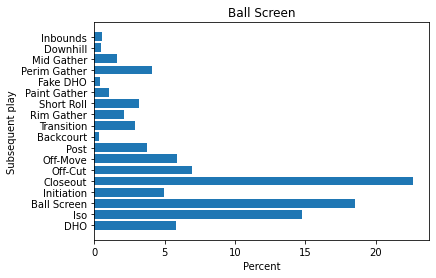

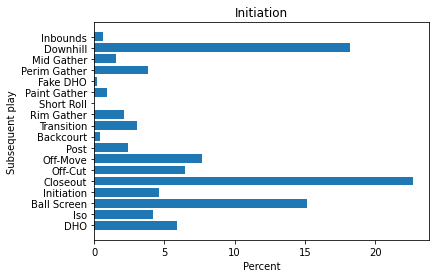

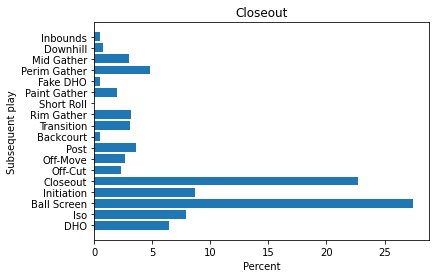

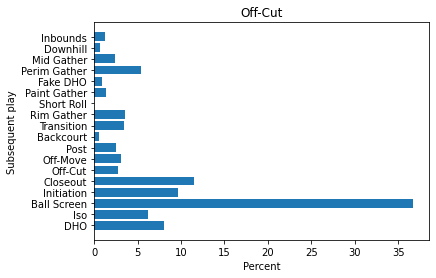

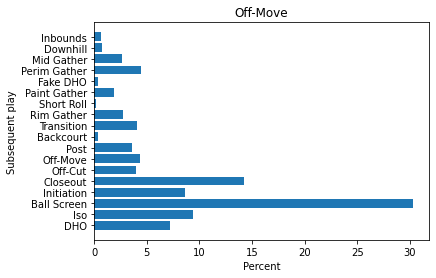

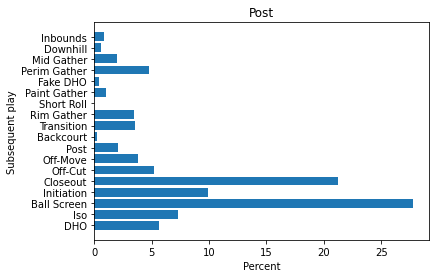

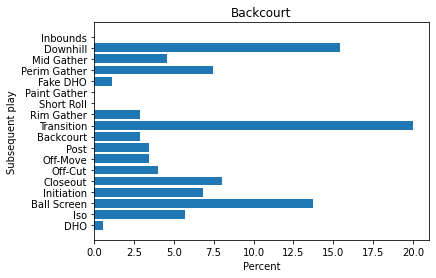

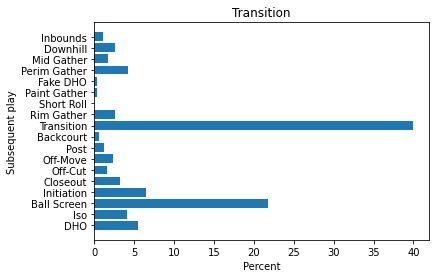

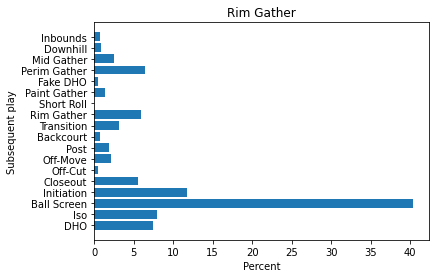

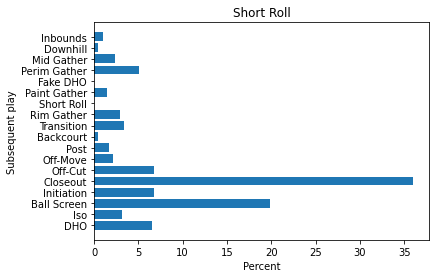

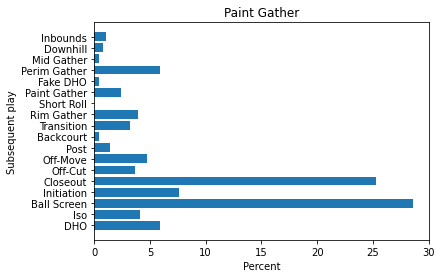

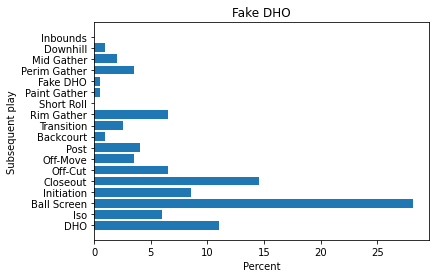

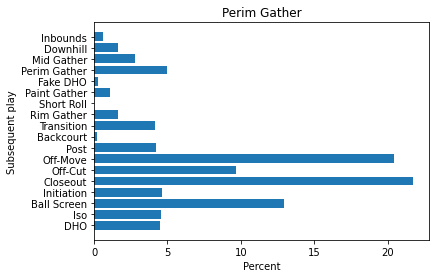

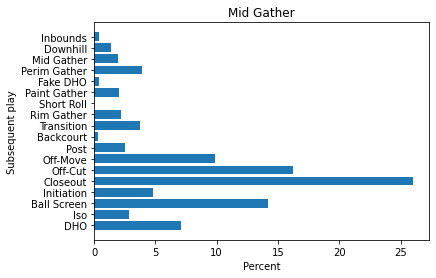

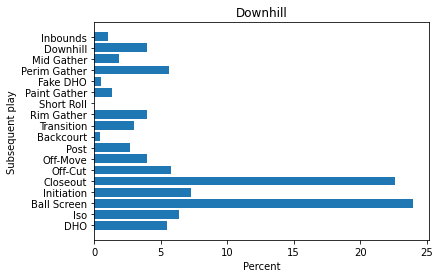

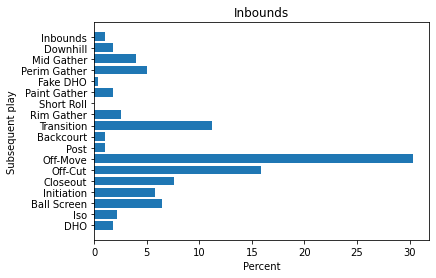

In [157]:
play_type_dict = {index: value for index, value in enumerate(play_types)}

for i in range(len(subsequent_play)):
    plt.barh(list(play_type_dict.values()), subsequent_play[i])
    plt.title(play_type_dict[i])
    plt.xlabel("Percent")
    plt.ylabel("Subsequent play")
    plt.show()



In [156]:
result_types = data['result_type'].unique()
sequences = {}
current_sequence = []
current_play_id = 0
current_sequence_id = data['sequence_id'][0]

for i in range(n):
    if current_sequence_id == data['sequence_id'][i]:
        if current_play_id == data['play_id'][i]:
            continue
        else:
            current_sequence.append(data['play_type'][i])
            current_play_id = data['play_id'][i]
    else:
        sequence = tuple(current_sequence)
        result = data['result_type'][i-1]
        if sequence in sequences:
            sequences[sequence][result] += 1
        else:
            sequences[sequence] = {result_type: 0 for result_type in result_types}
            sequences[sequence][result] += 1
        current_sequence = []
        current_sequence_id = data['sequence_id'][i]
        i -= 1
        
print()

1435
